<a href="https://colab.research.google.com/github/Arseniy-Polyakov/machine_learning_course/blob/main/Task_3_CNN_pictures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Данная работа посвящена обучению сверточной нейронной сети (CNN) для классификации изображений американского жестового языка на основе датасета [Sign Language MNIST](https://www.kaggle.com/datasets/datamunge/sign-language-mnist/data)

Импортируем библиотеки для предобработки данных, модели, слоев свертки, категоризации меток, а также функций деление на обучающую и тестовые выборки и оценки модели

In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Загружаем датасет с платформы Kaggle. Датасет открытый, поэтому авторизация через Kaggle API Token не нужна

In [ ]:
dataset = kagglehub.dataset_download("datamunge/sign-language-mnist")
dataset

'/kaggle/input/sign-language-mnist'

Выведем датасет в виде датафрейма

In [ ]:
df = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Извлечем значения пикселей (от 0 до 255 по каналам RGB), уже приведенные к серому цветоотнетку и нормированные по размеру (применена функция resize) для каждого семпла и сделаем нормализацию (приведем к диапазону от 0 до 1)

In [ ]:
images = df.drop("label" , axis = 1).values.reshape(-1,28,28,1)/255
images

Определим количество классов в датасете и категоризуем метки для обучения модели

In [ ]:
labels_classes = len(set(df["label"]))
labels = to_categorical(df["label"].values, num_classes=labels_classes+1)
print("The number of labels:", len(labels))
set_labels = set(df["label"])
print("Set labels:", set_labels)

The number of labels: 27455
Set labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}


Разделим выборку на обучающую и тестовую в соотношении 80/20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

Пропишем все слои свертки в объекте Sequential

In [ ]:
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32, (3,3) , activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3) , activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(25, activation = "softmax"))

Скомпилируем модель

In [ ]:
model.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy", "f1_score"])

Обучим модель на обучающей выборке. Проведем валидацию на тестовой. Экспериментальным путем было определено оптимальное количество эпох (epochs=11), при которых не происходит переобучение модели

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=12, batch_size=16)

Epoch 1/12
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9969 - f1_score: 0.9564 - loss: 0.0097 - val_accuracy: 0.9978 - val_f1_score: 0.9579 - val_loss: 0.0051
Epoch 2/12
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9957 - f1_score: 0.9549 - loss: 0.0114 - val_accuracy: 1.0000 - val_f1_score: 0.9600 - val_loss: 1.3217e-05
Epoch 3/12
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9979 - f1_score: 0.9572 - loss: 0.0069 - val_accuracy: 1.0000 - val_f1_score: 0.9600 - val_loss: 8.7297e-05
Epoch 4/12
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9984 - f1_score: 0.9577 - loss: 0.0042 - val_accuracy: 1.0000 - val_f1_score: 0.9600 - val_loss: 2.0205e-05
Epoch 5/12
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9969 - f1_score: 0.9562 - loss: 0.0106 - val_accuracy: 1.0000 - val_f1_score: 0.9600 - val_loss: 1.3707e-04
Epoch 6/12
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9979 - f1_score: 0.9574 - loss: 0.0059 - val_accuracy

In [ ]:
y_pred = model.predict(X_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Преобразуем вероятностные исходы для высчитывания метрик качества модели

In [ ]:
y_pred_final = np.argmax(y_pred, axis=1)
y_test_final = np.argmax(y_test, axis=1)

Оценим precision, recall, f1 для каждого класса

In [ ]:
classification_report_model = classification_report(y_pred_final, y_test_final, labels=list(set_labels))
print(classification_report_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00       188
           2       1.00      1.00      1.00       220
           3       1.00      1.00      1.00       256
           4       1.00      1.00      1.00       201
           5       1.00      1.00      1.00       242
           6       1.00      1.00      1.00       221
           7       1.00      1.00      1.00       205
           8       1.00      1.00      1.00       219
          10       1.00      1.00      1.00       219
          11       1.00      1.00      1.00       268
          12       1.00      1.00      1.00       232
          13       1.00      1.00      1.00       209
          14       1.00      1.00      1.00       219
          15       1.00      1.00      1.00       202
          16       1.00      1.00      1.00       291
          17       1.00      1.00      1.00       261
          18       1.00    

Составим матрицу ошибок

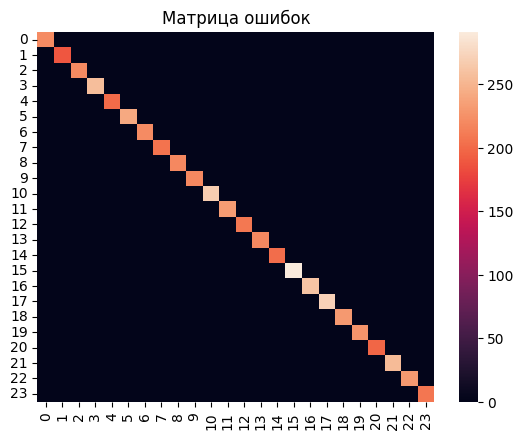

In [ ]:
confusion_matrix_model = confusion_matrix(y_pred_final, y_test_final)
sns.heatmap(confusion_matrix_model)
plt.title("Матрица ошибок")
plt.show()

Сохраняем модель

In [ ]:
model.save("/content/model.keras")